<a href="https://colab.research.google.com/github/eshasadia/AF-Net/blob/master/Notebooks/FFNet_TNBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone -b master https://github.com/eshasadia/NuRiSC_New.git

Cloning into 'NuRiSC_New'...
remote: Enumerating objects: 1162, done.
remote: Counting objects: 100% (418/418), done.
remote: Compressing objects: 100% (293/293), done.
remote: Total 1162 (delta 303), reused 179 (delta 123), pack-reused 744
Receiving objects: 100% (1162/1162), 883.92 MiB | 18.19 MiB/s, done.
Resolving deltas: 100% (330/330), done.
Checking out files: 100% (709/709), done.


In [ ]:
!pwd

/content


In [ ]:
cd NuRiSC_New

/content/NuRiSC_New


In [ ]:
!pip install stardist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 15.2 MB/s 
     |████████████████████████████████| 69 kB 8.6 MB/s 
     |████████████████████████████████| 2.9 MB 56.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
!pip install csbdeep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gputools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 152 kB 11.8 MB/s 
     |████████████████████████████████| 917 kB 21.9 MB/s 
     |████████████████████████████████| 191 kB 58.2 MB/s 
     |████████████████████████████████| 71 kB 10.2 MB/s 
     |████████████████████████████████| 78 kB 8.9 MB/s 
  Created wheel for pytools: filename=pytools-2022.1.13-py2.py3-none-any.whl size=66024 sha256=149702e392d0fa67aeb7cabea4c9ffa10428b3f93e71d128dbd0a547cbfd58c6
  Stored in directory: /root/.cache/pip/wheels/b5/c1/bb/26ba70fb9d10f195249ef4e170a92ae83e7534e55b67786fd9
  Created wheel for reikna: filename=reikna-0.7.6-py3-none-any.whl size=122374 sha256=dc3f77eba4233d947b25d8df1b0375be5b786b3a76c977dab3ebb23cffafc8e2
  Stored in directory: /root/.cache/pip/wheels/b3/75/7a/346bebf0d3c6095bc9a1db6df19a46c984798d673bbf38ce46
Successfully built pytools reikna


In [ ]:
!pip install keras_unet_collection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 4.5 MB/s 


In [ ]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
import json
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, normalize

from nurisc import fill_label_holes, random_label_cmap, calculate_extents, gputools_available
from nurisc.matching import matching, matching_dataset
from nurisc.models import Config2D, nurisc2D, nuriscData2D
from nurisc.utils import mask_to_categorical
from nurisc.plot import render_label


np.random.seed(0)
lbl_cmap = matplotlib.cm.prism
lbl_cmap_classes = matplotlib.cm.tab10

def plot_img_label(img, lbl, cls_dict, n_classes=6, img_title="image", lbl_title="label", cls_title="classes", **kwargs):
    c = mask_to_categorical(lbl, n_classes=n_classes, classes=cls_dict)
    res = np.zeros(lbl.shape, np.uint16)
    for i in range(1,c.shape[-1]):
        m = c[...,i]>0
        res[m] = i
    class_img = lbl_cmap_classes(res)
    # class_img[...,:3][res==0] = 0
    # class_img[...,-1][res==0] = 1

    fig, (ai,al,ac) = plt.subplots(1,3, figsize=(17,7), gridspec_kw=dict(width_ratios=(1.,1,1)))
    im = ai.imshow(img, cmap='gray')
    #fig.colorbar(im, ax = ai)
    ai.set_title(img_title)
    al.imshow(render_label(lbl, .8*normalize(img, clip=True), normalize_img=False, alpha_boundary=.8,cmap=lbl_cmap))
    al.set_title(lbl_title)
    ac.imshow(class_img)
    ac.imshow(render_label(res, .8*normalize(img, clip=True), normalize_img=False, alpha_boundary=.8, cmap=lbl_cmap_classes))
    ac.set_title(cls_title)
    plt.tight_layout()
    for a in ai,al,ac:
        a.axis("off")
    return ai,al,ac

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


Model: "denseUnet_fNLA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 528, 240, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv00_block1_conv (Conv2D)    (None, 528, 240, 5)  45          ['input_1[0][0]']                
                                                                                                  
 conv00_block1_bn (BatchNormali  (None, 528, 240, 5)  35         ['conv00_block1_conv[0][0]']     
 zation)                                                                                          
                                                                                     

nadam.py (78): The `lr` argument is deprecated, use `learning_rate` instead.


                                                                                                  
 conv00_block3_actv (Activation  (None, 528, 240, 5)  0          ['conv00_block3_bn[0][0]']       
 )                                                                                                
                                                                                                  
 conv00_block3_concat (Concaten  (None, 528, 240, 16  0          ['conv00_block2_concat[0][0]',   
 ate)                           )                                 'conv00_block3_actv[0][0]']     
                                                                                                  
 conv00_block4_conv (Conv2D)    (None, 528, 240, 5)  720         ['conv00_block3_concat[0][0]']   
                                                                                                  
 conv00_block4_bn (BatchNormali  (None, 528, 240, 5)  35         ['conv00_block4_conv[0][0]']     
 zation)  

In [ ]:
!unzip /content/cryonusegupdatednew.zip

Archive:  /content/cryonusegupdatednew.zip
   creating: cryonusegupdated/label masks modify/
  inflating: cryonusegupdated/label masks modify/Human_AdrenalGland_01.tif  
  inflating: cryonusegupdated/label masks modify/Human_AdrenalGland_02.tif  
  inflating: cryonusegupdated/label masks modify/Human_AdrenalGland_03.tif  
  inflating: cryonusegupdated/label masks modify/Human_Larynx_01.tif  
  inflating: cryonusegupdated/label masks modify/Human_Larynx_02.tif  
  inflating: cryonusegupdated/label masks modify/Human_Larynx_03.tif  
  inflating: cryonusegupdated/label masks modify/Human_LymphNodes_01.tif  
  inflating: cryonusegupdated/label masks modify/Human_LymphNodes_02.tif  
  inflating: cryonusegupdated/label masks modify/Human_LymphNodes_03.tif  
  inflating: cryonusegupdated/label masks modify/Human_Mediastinum_01.tif  
  inflating: cryonusegupdated/label masks modify/Human_Mediastinum_02.tif  
  inflating: cryonusegupdated/label masks modify/Human_Mediastinum_03.tif  
  inflatin

In [ ]:
#CRYONUSEG

#%%
#CRYONUSEG
from tifffile import imread

X= sorted(glob('/content/NuRiSC_New/cryonusegupdated/tissue images/*.tif'))
Y= sorted(glob('/content/NuRiSC_New/cryonusegupdated/label masks/*.tif'))
# print(X)
# print(Y)
X = list(map(imread,X))
Y = list(map(imread,Y))
print(X[0].shape)
# Y = [y[...,0] for y in Y]

n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]

(512, 512, 3)


In [ ]:
axis_norm = (0,1)   # normalize channels independently
# axis_norm = (0,1,2) # normalize channels jointly
if n_channel > 1:
    print("Normalizing image channels %s." % ('jointly' if axis_norm is None or 2 in axis_norm else 'independently'))
    sys.stdout.flush()
X = [normalize(x,1,99.8,axis=axis_norm) for x in tqdm(X)]
Y = [fill_label_holes(y) for y in tqdm(Y)]

Normalizing image channels independently.


100%|██████████| 30/30 [00:02<00:00, 14.01it/s]


In [ ]:
assert len(X) > 1, "not enough training data"
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
n_val = max(1, int(round(0.4 * len(ind))))
ind_train, ind_val = ind[:-n_val], ind[-n_val:]
X_val, Y_val = [X[i] for i in ind_val]  , [Y[i] for i in ind_val]
X_trn, Y_trn = [X[i] for i in ind_train], [Y[i] for i in ind_train] 
print('number of images: %3d' % len(X))
print('- training:       %3d' % len(X_trn))
print('- validation:     %3d' % len(X_val))

number of images:  30
- training:        18
- validation:      12


In [ ]:
from stardist.plot import render_label
def plot_img_label(img, lbl, img_title="image", lbl_title="label", **kwargs):
  

    fig, (ai,al) = plt.subplots(1,2, figsize=(17,7), gridspec_kw=dict(width_ratios=(1,1)))
    im = ai.imshow(img, cmap='gray')
    #fig.colorbar(im, ax = ai)
    ai.set_title(img_title)
    al.imshow(render_label(lbl, .3*normalize(img, clip=True), normalize_img=False, alpha_boundary=.8,cmap='tab10'))
    al.set_title(lbl_title)
    
    plt.tight_layout()
    for a in ai,al:
        a.axis("off")
    return ai,al

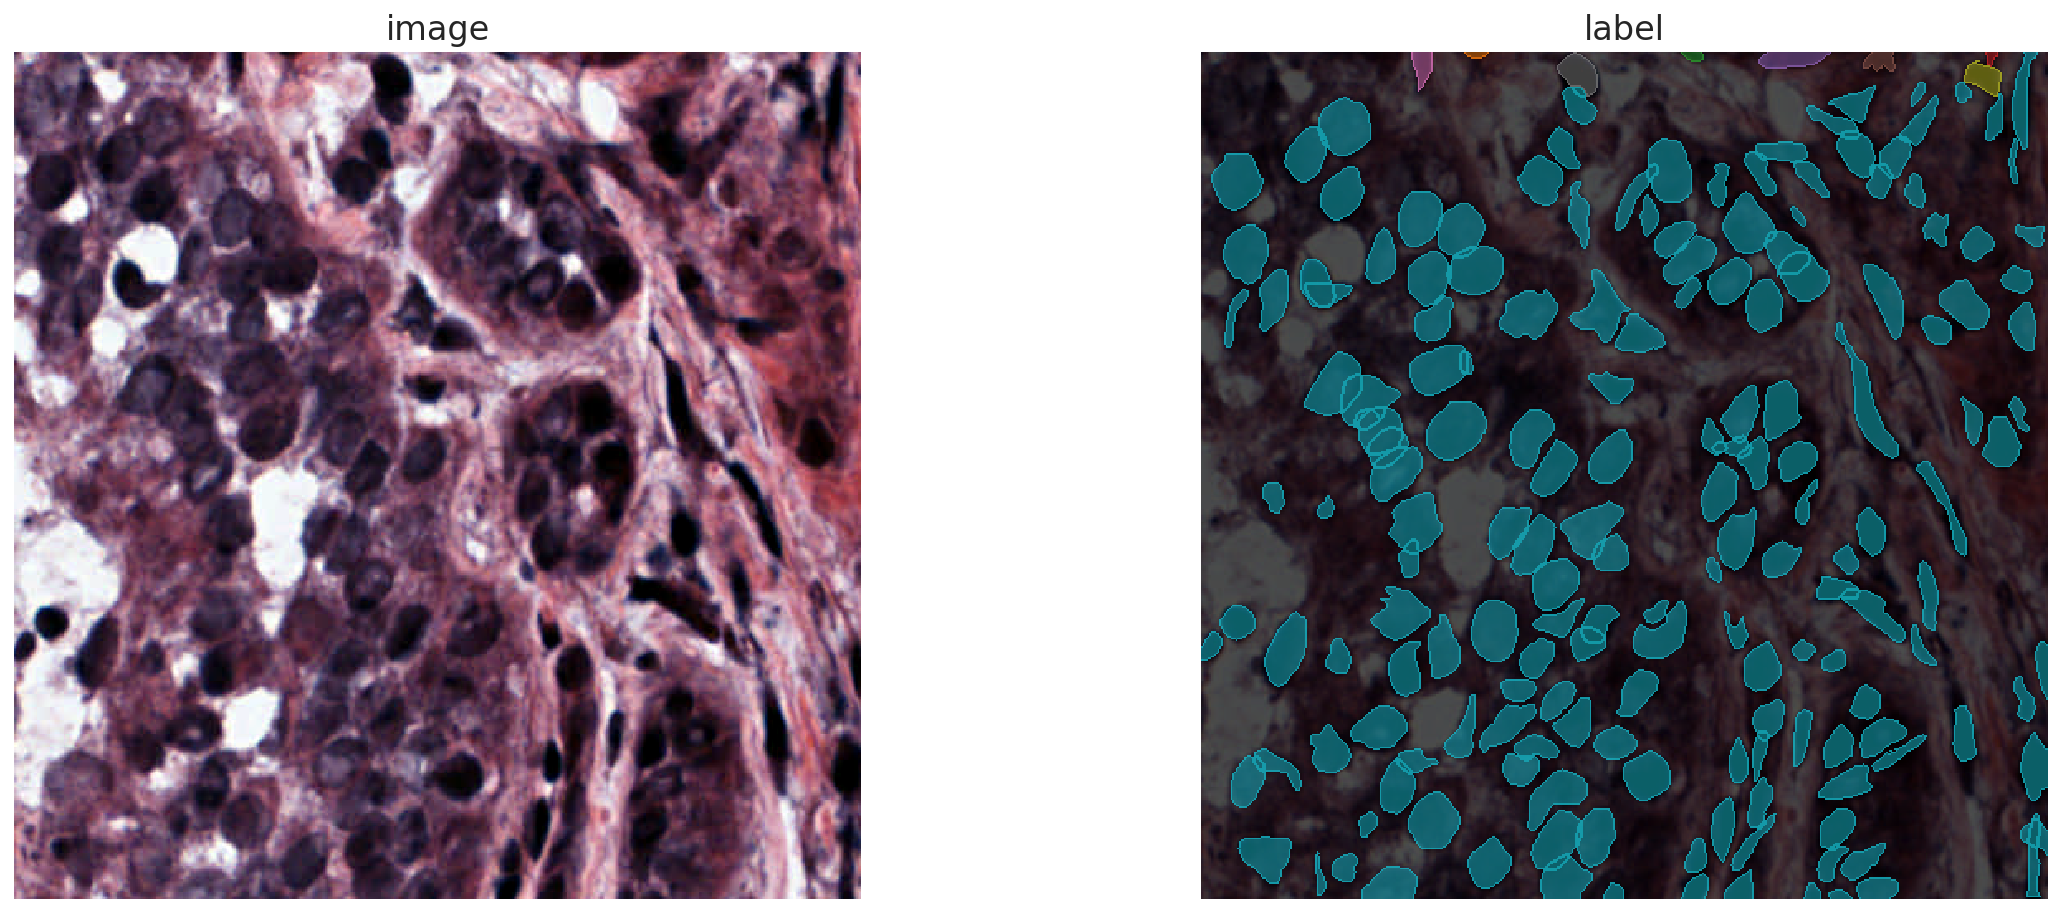

In [ ]:
i = min(1500, len(X)-1)
img, lbl = X[i], Y[i]
# print(lbl.shape)
# print(max(lbl[120]))
assert img.ndim in (2,3)
img = img if (img.ndim==2 or img.shape[-1]==3) else img[...,0]
plot_img_label(img,lbl)
None;

In [ ]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
import json
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, normalize

from nurisc import fill_label_holes, random_label_cmap, calculate_extents, gputools_available
from nurisc.matching import matching, matching_dataset
from nurisc.models import Config2D, nurisc2D, nuriscData2D
from nurisc.utils import mask_to_categorical
from nurisc.plot import render_label

In [ ]:
print(Config2D.__doc__)

Configuration for a :class:`nurisc2D` model.

    Parameters
    ----------
    axes : str or None
        Axes of the input images.
    n_rays : int
        Number of radial directions for the nuclei.
    n_channel_in : int
        Number of channels of given input image (default: 1).

    grid : (int,int)
        Subsampling factors (must be powers of 2) for each of the axes.
        Model will predict on a subsampled grid for increased efficiency and larger field of view.
    n_classes : None or int
        Number of object classes to use for multi-class prediction (use None to disable)
    backbone : str
        Name of the neural network architecture to be used as backbone.
    kwargs : dict
        Overwrite (or add) configuration attributes (see below).


    Attributes
    ----------
    unet_n_depth : int
        Number of U-Net resolution levels (down/up-sampling layers).
    unet_kernel_size : (int,int)
        Convolution kernel size for all (U-Net) convolution layers.
    

In [ ]:
# 32 is a good default choice
n_rays = 32
n_classes= 1
# Use OpenCL-based computations for data generator during training (requires 'gputools')
use_gpu = True and gputools_available()

# Predict on subsampled grid for increased efficiency and larger field of view
grid = (2,2)

conf = Config2D (
    n_rays       = n_rays,
    grid         = grid,
    use_gpu      = True,
    n_channel_in = n_channel,
    n_classes    = n_classes,
   # train_class_weights=(1,2.3581024244032336,3.8217535910612446,3.078248267944116,7.188182340917902,3.485527854099882),
   #  train_class_loss='cce_dice',
    train_batch_size=4,
    train_patch_size=(512,512),
    backbone='ffnet',
    # train_learning_rate=0.0001
    # set the number of object classes
)
print(conf)
vars(conf)

If you want to compute separable approximations, please install it with
pip install scikit-tensor-py3
Config2D(axes='YXC', backbone='ffnet', grid=(2, 2), head_blocks=2, n_channel_in=3, n_channel_out=33, n_classes=1, n_dim=2, n_rays=32, net_conv_after_unet=128, net_input_shape=(None, None, 3), net_mask_shape=(None, None, 1), train_background_reg=0.0001, train_batch_size=4, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_class_loss='cce_tversky', train_class_weights=(1, 1), train_completion_crop=32, train_dist_loss='mae', train_epochs=400, train_focal_gamma=0, train_foreground_only=0.9, train_learning_rate=0.0003, train_loss_weights=(1, 0.2, 1), train_n_val_patches=None, train_patch_size=(512, 512), train_reduce_lr={'factor': 0.5, 'patience': 40, 'min_delta': 0}, train_sample_cache=True, train_shape_completion=False, train_steps_per_epoch=100, train_tensorboard=True, unet_activation='relu', unet_batch_norm=True, 

{'n_dim': 2,
 'axes': 'YXC',
 'n_channel_in': 3,
 'n_channel_out': 33,
 'train_checkpoint': 'weights_best.h5',
 'train_checkpoint_last': 'weights_last.h5',
 'train_checkpoint_epoch': 'weights_now.h5',
 'n_rays': 32,
 'grid': (2, 2),
 'backbone': 'ffnet',
 'n_classes': 1,
 'unet_n_depth': 4,
 'unet_kernel_size': (3, 3),
 'unet_n_filter_base': 32,
 'unet_n_conv_per_depth': 2,
 'unet_pool': (2, 2),
 'unet_activation': 'relu',
 'unet_last_activation': 'relu',
 'unet_batch_norm': True,
 'unet_dropout': 0.0,
 'unet_prefix': '',
 'net_conv_after_unet': 128,
 'head_blocks': 2,
 'net_input_shape': (None, None, 3),
 'net_mask_shape': (None, None, 1),
 'train_shape_completion': False,
 'train_completion_crop': 32,
 'train_patch_size': (512, 512),
 'train_background_reg': 0.0001,
 'train_foreground_only': 0.9,
 'train_sample_cache': True,
 'train_dist_loss': 'mae',
 'train_class_loss': 'cce_tversky',
 'train_loss_weights': (1, 0.2, 1),
 'train_class_weights': (1, 1),
 'train_epochs': 400,
 'train_

In [ ]:
model = nurisc2D(config=None, name='fanet', basedir='models')

Using default values: prob_thresh=0.5, nms_thresh=0.4.


In [ ]:
median_size = calculate_extents(list(Y), np.median)
fov = np.array(model._axes_tile_overlap('YX'))
print(f"median object size:      {median_size}")
print(f"network field of view :  {fov}")
print('done')
if any(median_size > fov):
    print("WARNING: median object size larger than field of view of the neural network.")

structured_function.py (264): Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.


1/1 [==============================] - 0s 178ms/step
median object size:      [20. 20.]
network field of view :  [86 89]
done


In [ ]:
def random_fliprot(img, mask): 
    assert img.ndim >= mask.ndim
    axes = tuple(range(mask.ndim))
    perm = tuple(np.random.permutation(axes))
    img = img.transpose(perm + tuple(range(mask.ndim, img.ndim))) 
    mask = mask.transpose(perm) 
    for ax in axes: 
        if np.random.rand() > 0.5:
            img = np.flip(img, axis=ax)
            mask = np.flip(mask, axis=ax)
    return img, mask 

def random_intensity_change(img):
    img = img*np.random.uniform(0.6,2) + np.random.uniform(-0.2,0.2)
    return img
# def random_crop(img,mask):
#     assert img.ndim >= mask.ndim
#     axes = tuple(range(mask.ndim))
#     perm = tuple(np.random.permutation(axes))
#     img= iaa.Crop(percent=(0, 0.3)) # crop image
#     mask= iaa.Crop(percent=(0, 0.3))
#     return img, mask 
# def random_img_shearing(img,mask):
#   shear = iaa.Affine(shear=(0,40))
#   img = shear.augment_image(img)
#   mask = shear.augment_image(mask)
#   return img, mask
def augmenter(x, y):
    """Augmentation of a single input/label image pair.
    x is an input image
    y is the corresponding ground-truth label image
    """
    x, y = random_fliprot(x, y)
    # x,y =random_crop(x,y)
    # x,y =random_img_shearing(x,y)
    x = random_intensity_change(x)
    # add some gaussian noise
    sig = 0.02*np.random.uniform(0,1)
    x = x + sig*np.random.normal(0,1,x.shape)
    return x, y

In [ ]:
quick_demo = False

if quick_demo:
    print (
        "NOTE: This is only for a quick demonstration!\n"
        "      Please set the variable 'quick_demo = False' for proper (long) training.",
        file=sys.stderr, flush=True
    )
    model.train(X_trn, Y_trn, validation_data=(X_val,Y_val), augmenter=augmenter,
                epochs=1, steps_per_epoch=10)

    print("====> Stopping training and loading previously trained demo model from disk.", file=sys.stderr, flush=True)
    
else:
    model.train(X_trn, Y_trn, validation_data=(X_val,Y_val), augmenter=augmenter,epochs=200, steps_per_epoch=64)
    print('done')
None;

1.0 0.7
class_loss:    cce_tversky
class_weights: (1, 1)
focal_gamma:   0
Epoch 1/200


Cause: Unable to locate the source code of <function _gcd_import at 0x7f8417537430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function _gcd_import at 0x7f8417537430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
64/64 [==============================] - 87s 1s/step - loss: 2.6547 - prob_loss: 0.3783 - dist_loss: 6.8603 - prob_class_loss: 0.9043 - prob_kld: 0.2212 - dist_relevant_mae: 6.8599 - dist_relevant_mse: 83.1738 - dist_dist_iou_metric: 0.1596 - prob_class_dice_loss: 0.5525 - prob_class_categorical_crossentropy: 0.4054 - val_loss: 3.9213 - val_prob_loss: 0.4392 - val_dist_loss: 7.5306 - val_prob_class_loss: 1.9759 - val_prob_kld: 0.2443 - val_dist_relevant_mae: 7.5304 - val_dist

In [ ]:
quick_demo = False
if quick_demo:
    model.optimize_thresholds(X_val[:2], Y_val[:2])
else:
    model.optimize_thresholds(X_val, Y_val)

1/1 [==============================] - 0s 164ms/step


NMS threshold = 0.5:  75%|███████▌  | 15/20 [00:19<00:06,  1.28s/it, 0.570 -> 0.378]


Using optimized values: prob_thresh=0.507396, nms_thresh=0.3.
Saving to 'thresholds.json'.


In [ ]:
from stardist import nms

In [ ]:
Y_val_pred = [model.predict_instances(x, n_tiles=model._guess_n_tiles(x), show_tile_progress=False)[0]
              for x in tqdm(X_val)]


  0%|          | 0/12 [00:00<?, ?it/s]

1/1 [==============================] - 0s 166ms/step


  8%|▊         | 1/12 [00:00<00:07,  1.41it/s]

1/1 [==============================] - 0s 157ms/step


 17%|█▋        | 2/12 [00:01<00:05,  1.73it/s]

1/1 [==============================] - 0s 159ms/step


 25%|██▌       | 3/12 [00:01<00:04,  1.82it/s]

1/1 [==============================] - 0s 166ms/step


 33%|███▎      | 4/12 [00:02<00:04,  1.93it/s]

1/1 [==============================] - 0s 163ms/step


 42%|████▏     | 5/12 [00:02<00:03,  2.23it/s]

1/1 [==============================] - 0s 160ms/step


 50%|█████     | 6/12 [00:02<00:02,  2.20it/s]

1/1 [==============================] - 0s 174ms/step


 58%|█████▊    | 7/12 [00:03<00:02,  2.13it/s]

1/1 [==============================] - 0s 166ms/step


 67%|██████▋   | 8/12 [00:03<00:01,  2.19it/s]

1/1 [==============================] - 0s 169ms/step


 75%|███████▌  | 9/12 [00:04<00:01,  2.10it/s]

1/1 [==============================] - 0s 166ms/step


 83%|████████▎ | 10/12 [00:04<00:00,  2.14it/s]

1/1 [==============================] - 0s 174ms/step


 92%|█████████▏| 11/12 [00:05<00:00,  2.15it/s]

1/1 [==============================] - 0s 161ms/step


100%|██████████| 12/12 [00:05<00:00,  2.05it/s]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa27676b940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa22d5ddd30>)

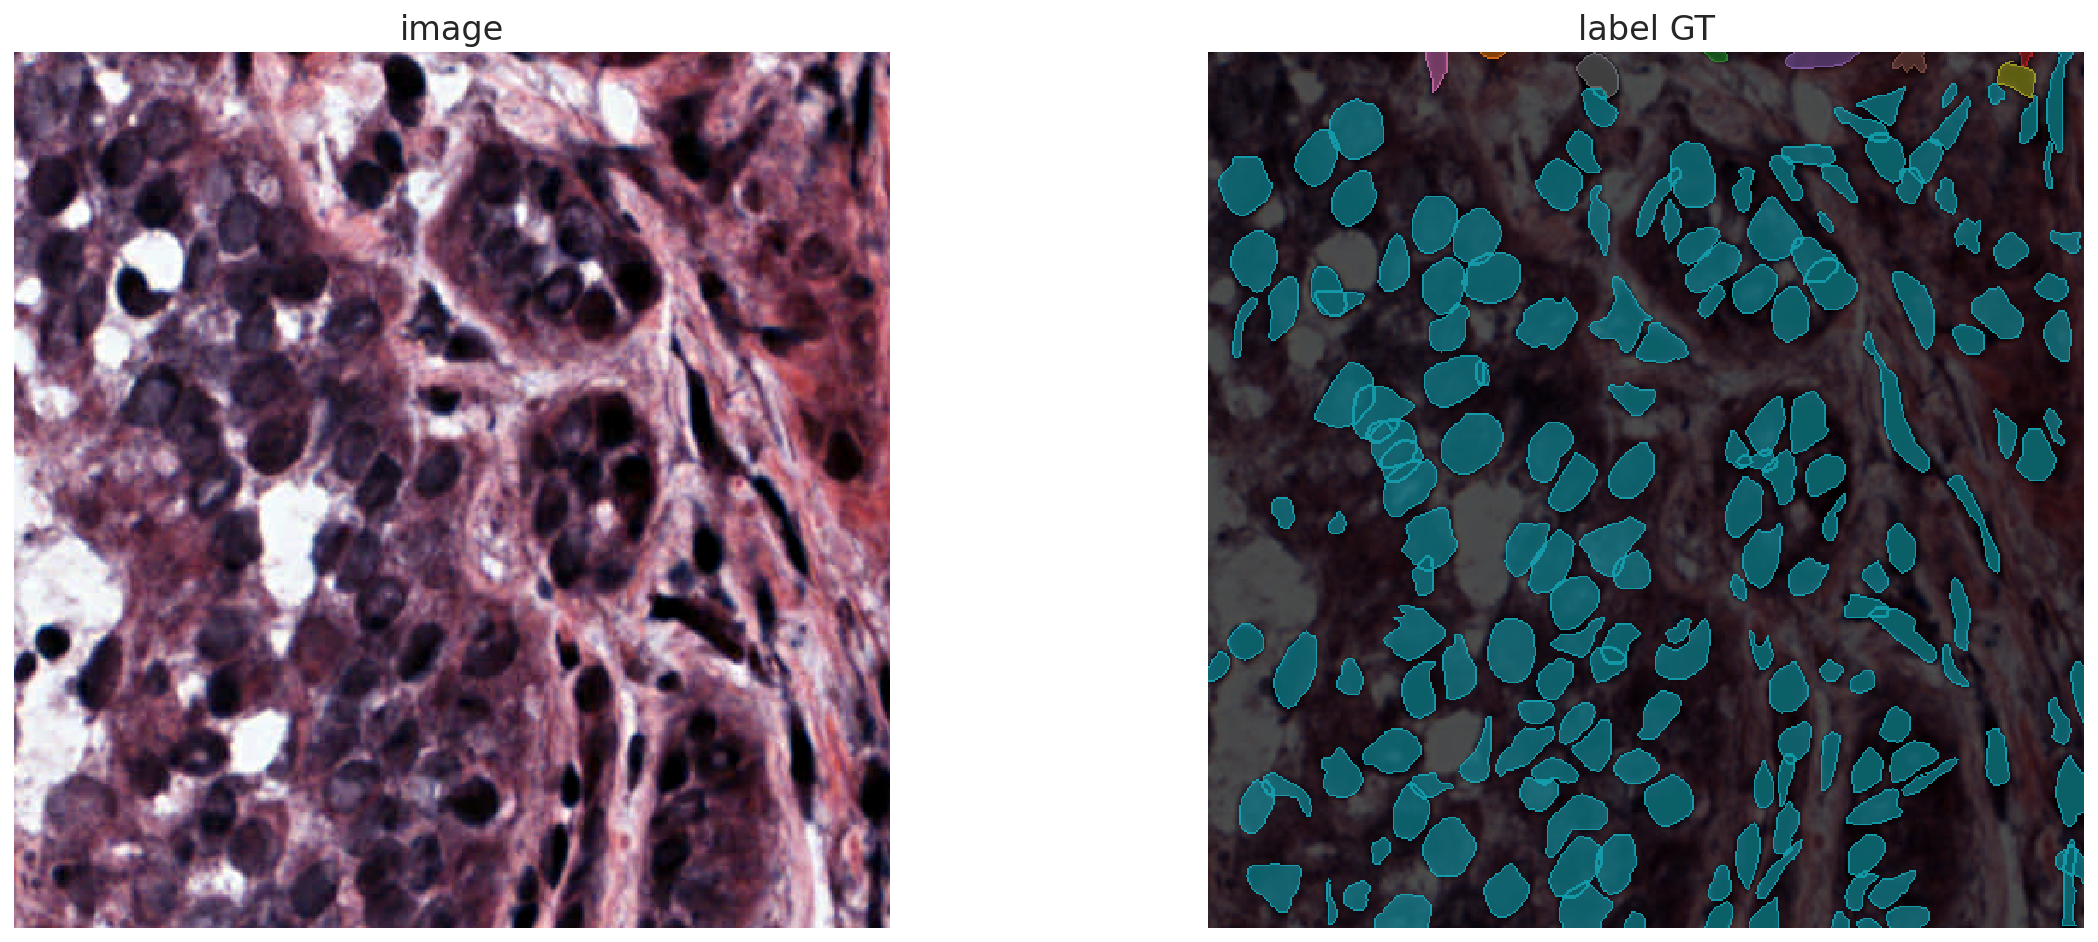

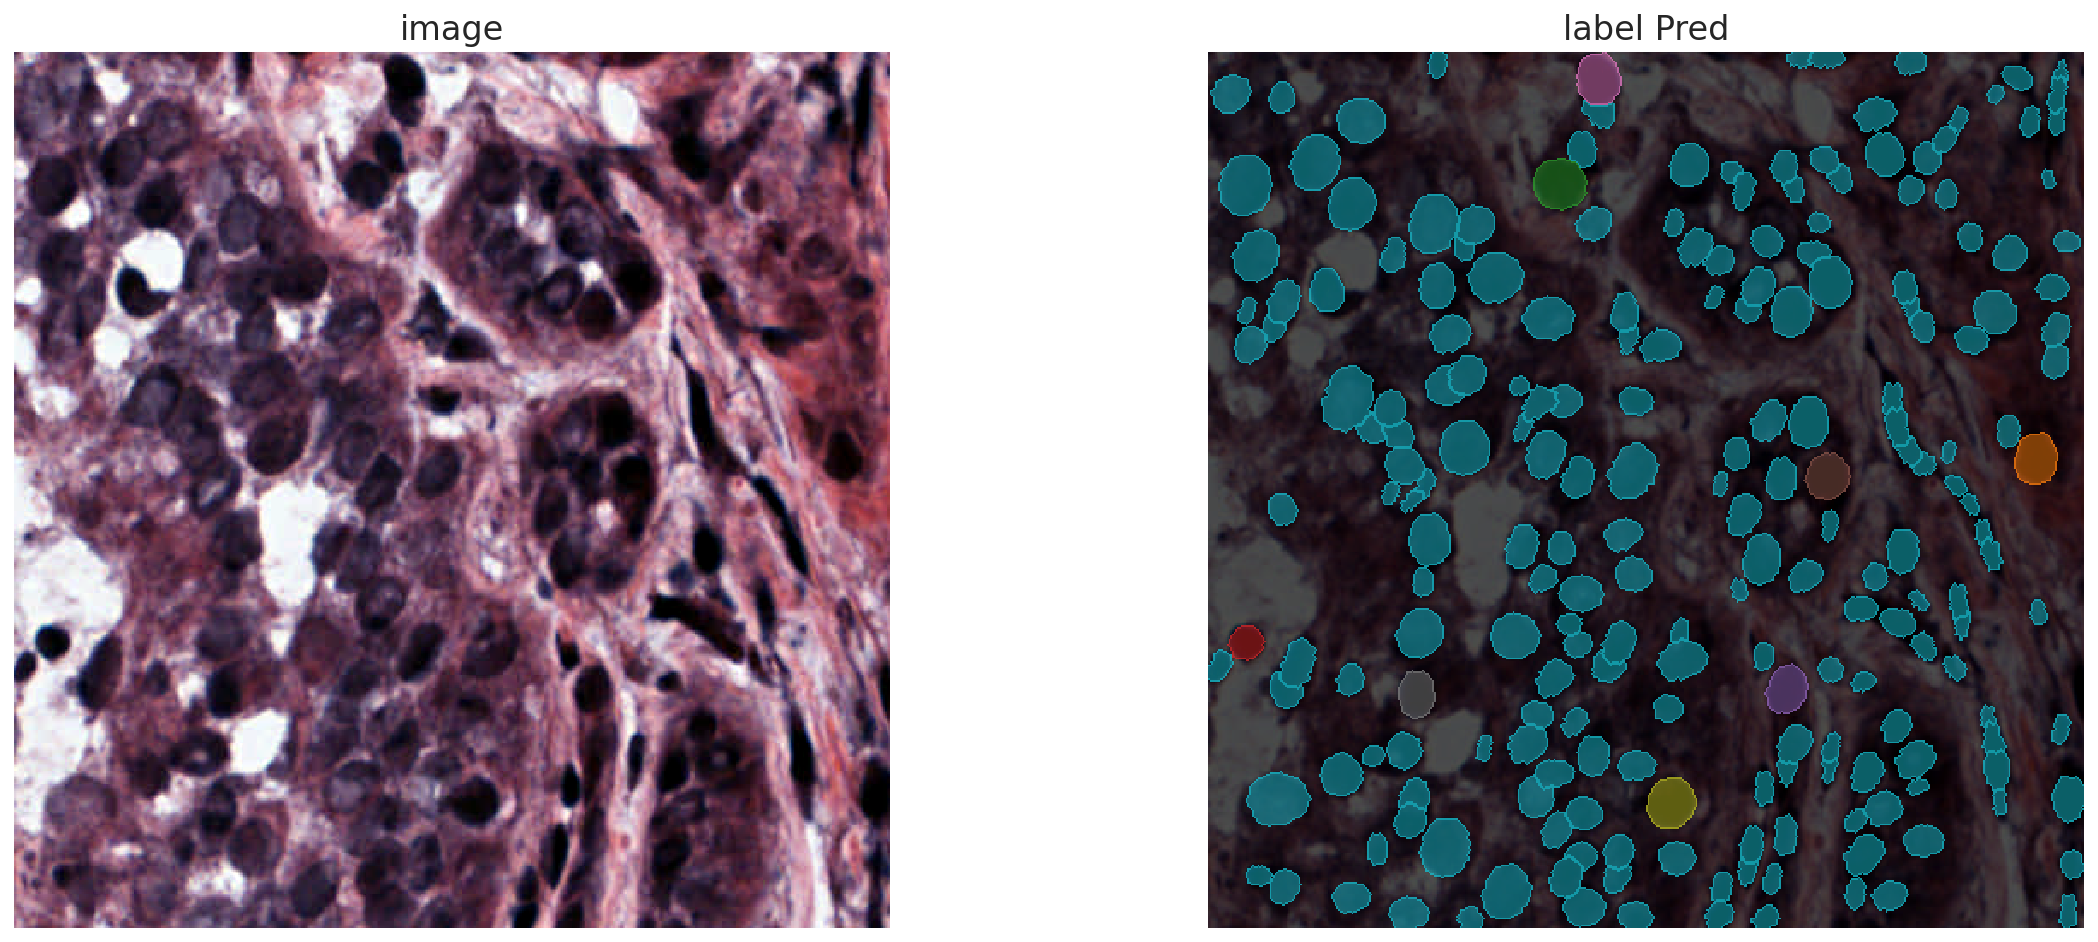

In [ ]:
plot_img_label(X_val[5],Y_val[5], lbl_title="label GT")
plot_img_label(X_val[5],Y_val_pred[5], lbl_title="label Pred")

In [ ]:
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
stats = [matching_dataset(Y_val, Y_val_pred, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:01<00:00,  5.37it/s]


In [ ]:
stats[taus.index(0.5)]

DatasetMatching(criterion='iou', thresh=0.5, fp=1216, tp=2097, fn=1935, precision=0.6329610624811349, recall=0.5200892857142857, accuracy=0.39958079268292684, f1=0.571000680735194, n_true=4032, n_pred=3313, mean_true_score=0.36128432315493386, mean_matched_score=0.6946582694137784, panoptic_quality=0.3966503447135993, segmentation_quality=0.6946582694137784, detection_quality=0.571000680735194, by_image=False)

In [ ]:
assert len(X) > 1, "not enough training data"
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
n_val = max(1, int(round(0.3 * len(ind))))
ind_train, ind_val = ind[:-n_val], ind[-n_val:]
cls_val_new = [cls[i] for i in ind_val]

In [ ]:
from nltk import flatten
cls_val_tmp_dict = [[0 for x in range(66536)] for y in range(len(Cls_val))]
cls_val_dict = [[0 for x in range(66536)] for y in range(len(Cls_val))]
cls_tmp_val=np.zeros_like(Y_val)
for i in range(len(Cls_val)):

   cls_tmp_val[i]=test_img_res( Y_val_pred[i],    class_from_res(res_val_pred[i]));
# cls=[cls[...,4]for cls in val_data]
# cls_val_new = Cls_val
for i in range(len(Cls_val)):
    cls_val_dict[i]=cls_val_new[i].flatten()
    cls_val_tmp_dict[i]=cls_tmp_val[i].flatten()
tr=list(cls_val_tmp_dict)
tr1=flatten(tr)
z=np.concatenate( tr1, axis=0 )
tr2=list(cls_val_dict)
tr3=flatten(tr2)
w=np.concatenate( tr3, axis=0 )

(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 3]
(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]]
[0 1 3]
(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 2 3]
(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 3]
(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 3]
(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 3]
(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 2 3]
(256, 256)
[[0 0 0 ... 0 

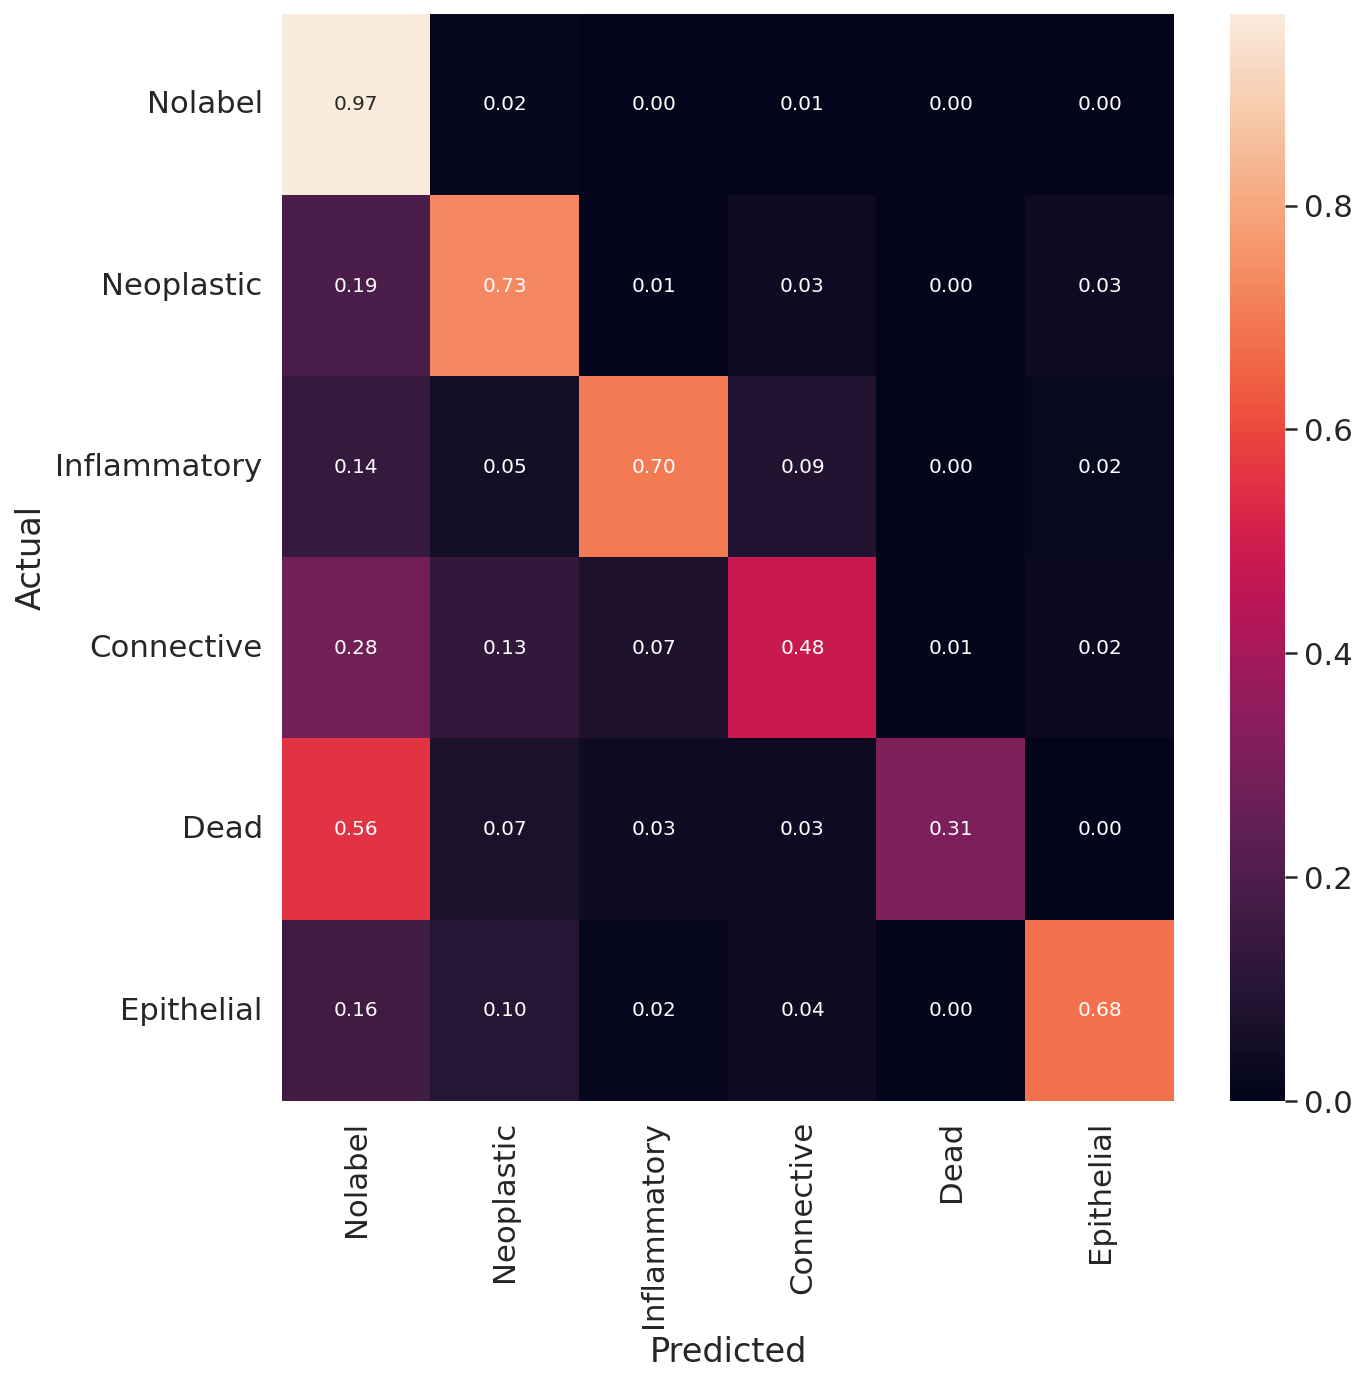

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
target_names=['Nolabel','Neoplastic', 'Inflammatory', 'Connective','Dead','Epithelial']
cm = confusion_matrix(w, z)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

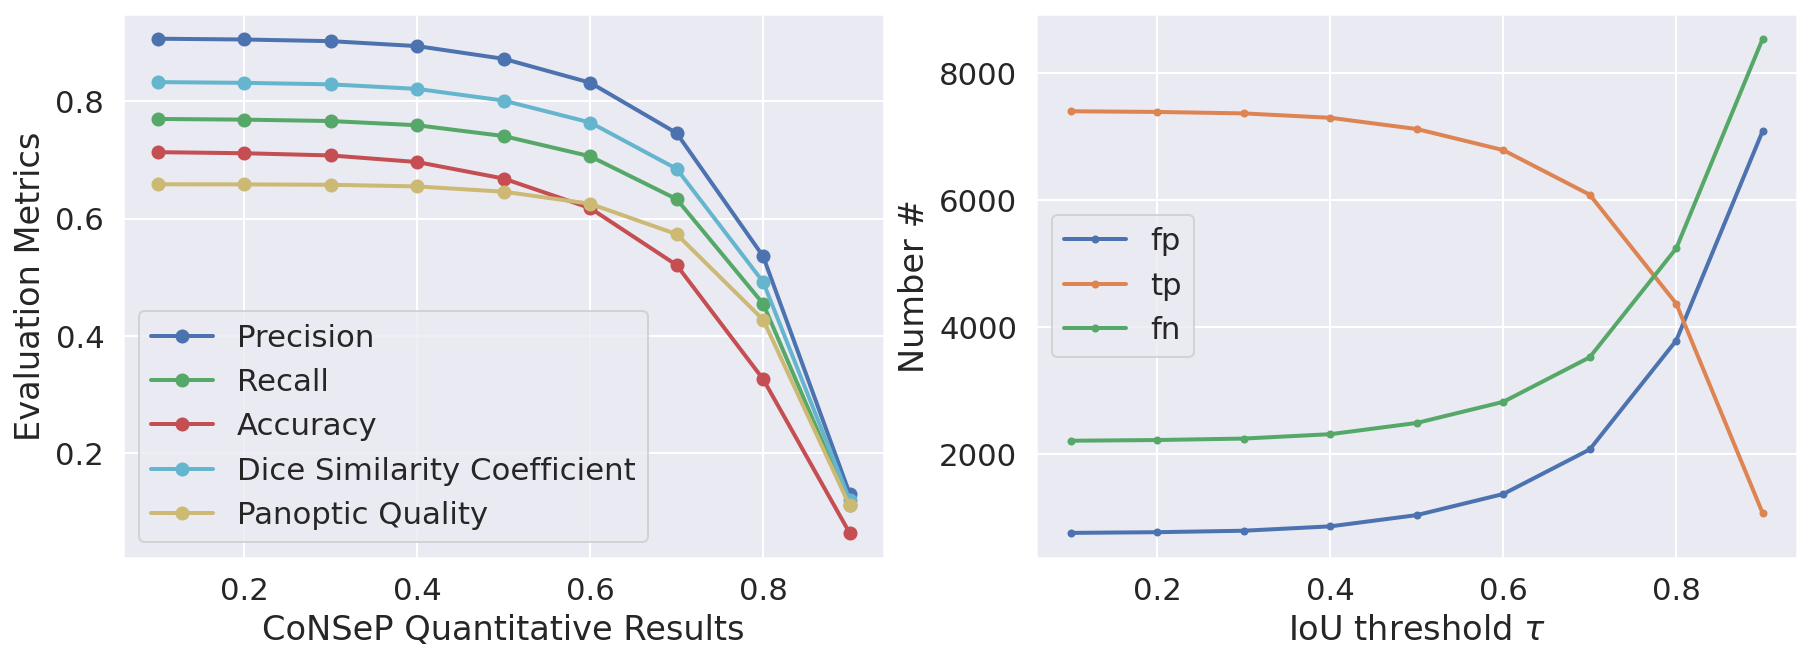

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
colors = "bgrcymkw"
i= 0
for m in ('precision', 'recall', 'accuracy', 'f1', 'panoptic_quality'):
    ax1.plot(taus, [s._asdict()[m] for s in stats], '.-', lw=2, label=m,c=colors[i],marker='o')
    i=i+1
ax1.set_xlabel(r'CoNSeP Quantitative Results')
ax1.set_ylabel('Evaluation Metrics')
# t="CPM-17 Quantitative Results"
# ax1.title(t)
# ax1.grid()
ax1.legend()
L=ax1.legend()
L.get_texts()[0].set_text('Precision')
L.get_texts()[1].set_text('Recall')
L.get_texts()[2].set_text('Accuracy')
L.get_texts()[3].set_text('Dice Similarity Coefficient')
L.get_texts()[4].set_text('Panoptic Quality')
for m in ('fp', 'tp', 'fn'):
    ax2.plot(taus, [s._asdict()[m] for s in stats], '.-', lw=2, label=m)
ax2.set_xlabel(r'IoU threshold $\tau$')
ax2.set_ylabel('Number #')
# ax2.grid()
ax2.legend();

accuracy:0.921640165352527
precision:0.648035248355708
sensitivity:0.6453762424443564
dice_score:0.6448043732345602
dice_score background:0.965841905911001
dice_score neoplastic:0.7513536480588124
dice_score inflammatory:0.6767329871982878
dice_score connective:0.5311941471046197
dice_score dead:0.2695037858301785
dice_score epithelial:0.6741997653044617

meanresultsoverallsamples:
accuracy             0.921640
diceoverall          0.644804
dice background      0.965842
dice neoplastic      0.751354
dice inflammatory    0.676733
dice connective      0.531194
dice dead            0.269504
dice epithelial      0.674200
dtype: float64


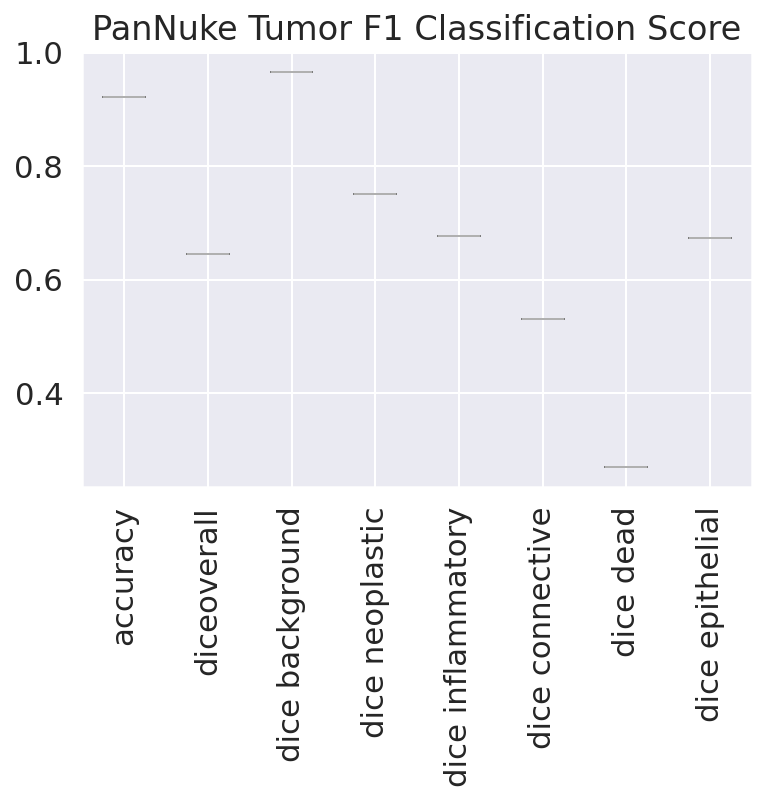

In [ ]:
# import numpy as np
# from miscnn.data_loading.interfaces.nifti_io\
# import NIFTI_interface
# from miscnn.data_loading.data_ioimportData_IO
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd


# interface=NIFTI_interface(pattern="sample[0-9]*",
# channels=1,classes=5)

# data_path="./data/filestructure/"
# data_io=Data_IO(interface,data_path,delete_batchDir=True)

sample_data={}
index=0

# foriinrange(352,369):
sample_data[index]=[]

# pred=interface.load_prediction("./predictions/sample"+str(i),"./")
# seg=interface.load_segmentation("sample"+str(i))
# pred=pred.ravel()
# seg=seg.ravel()
# print("sample"+str(i)+":")


accuracy=np.mean(w==z)
sample_data[index].append(accuracy)
p_r_f=precision_recall_fscore_support(w,z,average='macro',zero_division=0)
sample_data[index].append(p_r_f[2])

print("accuracy:"+str(accuracy))
print("precision:"+str(p_r_f[0]))
print("sensitivity:"+str(p_r_f[1]))
print("dice_score:"+str(p_r_f[2]))

p_r_f=precision_recall_fscore_support(w,z,average='macro',zero_division=0,labels=[0.])
sample_data[index].append(p_r_f[2])
print("dice_score background:"+str(p_r_f[2]))

p_r_f=precision_recall_fscore_support(w,z,average='macro',zero_division=0,labels=[1.])
sample_data[index].append(p_r_f[2])
print("dice_score neoplastic:"+str(p_r_f[2]))

p_r_f=precision_recall_fscore_support(w,z,average='macro',zero_division=0,labels=[2.])
sample_data[index].append(p_r_f[2])
print("dice_score inflammatory:"+str(p_r_f[2]))

p_r_f=precision_recall_fscore_support(w,z,average='macro',zero_division=0,labels=[3.])
sample_data[index].append(p_r_f[2])
print("dice_score connective:"+str(p_r_f[2]))

p_r_f=precision_recall_fscore_support(w,z,average='macro',zero_division=0,labels=[4.])
sample_data[index].append(p_r_f[2])
print("dice_score dead:"+str(p_r_f[2]))

p_r_f=precision_recall_fscore_support(w,z,average='macro',zero_division=0,labels=[5.])
sample_data[index].append(p_r_f[2])
print("dice_score epithelial:"+str(p_r_f[2]))
index=index+1
print()

df=pd.DataFrame.from_dict(sample_data,orient="index",
columns=["accuracy","diceoverall","dice background","dice neoplastic",
"dice inflammatory","dice connective","dice dead", "dice epithelial"])

print("meanresultsoverallsamples:")

print(df.mean(axis=0))
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot(rot=90,boxprops=dict(color='black'))
plt.title("PanNuke Tumor F1 Classification Score")
plt.show()  